
# Week 10: Linear Regression
In this section, we will learn how to perform simple and multiple linear regression on a dataset.


### What is Linear Regression?

Linear regression is a method used to model the relationship between two variables by fitting a linear equation to observed data.
- The variable we are predicting is called the **dependent variable** (or response variable, `Y`).
- The variable we use to make predictions is called the **independent variable** (or predictor variable, `X`).

In this case, we are using horsepower as our independent variable (X) and mpg (miles per gallon) as our dependent variable (Y).

The goal is to find the **best-fit line** for the data. This line minimizes the sum of the squared differences between the observed values and the predicted values. This is known as **least squares regression**.

---

#### What does the regression output mean?

- **Intercept**: The value of Y when X is zero. This is the point where the line crosses the Y-axis.
- **Slope (Coefficient)**: The amount by which Y changes for a unit increase in X.
- **R-squared**: This tells us how well the model explains the variability in the data. A higher R-squared value (closer to 1) indicates a better fit.
- **p-value**: Helps determine whether the relationship between X and Y is statistically significant.

---

We will start with a simple linear regression model and then extend it to a multiple regression model.

Our focus will be on understanding how the models are built and interpreted.

---

## SETUP

In [28]:
#!pip install ISLP

**If you are using Google Colab, after installing, it might be necessary to restart the kernel.**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from ISLP import load_data
from ISLP.models import (ModelSpec, summarize , poly)
import matplotlib.pyplot as plt
import seaborn as sns

Also import the statsmodels library.
We will use this library to build our regression models.

In [2]:
import statsmodels.api as sm

### 1. Loading the Dataset
The first step is to load the dataset and explore its structure. This will help us understand what variables are available and how they might relate to each other.


Reference: [Boston Dataset](https://islp.readthedocs.io/en/latest/datasets/Boston.html)

**Data Dictionary:**

- 1. `crim`     per capita crime rate by town
- 2. `zn`       proportion of residential land zoned for lots over 25,000 sq.ft.
- 3. `indus`    proportion of non-retail business acres per town
- 4. `chas`     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- 5. `nox`      nitric oxides concentration (parts per 10 million)
- 6. `rm`       average number of rooms per dwelling
- 7. `age`      proportion of owner-occupied units built prior to 1940
- 8. `dis`      weighted distances to five Boston employment centres
- 9. `rad`      index of accessibility to radial highways
- 10. `tax`      full-value property-tax rate per $10,000
- 11. `pratio`  pupil-teacher ratio by town
- 12. `lstat`    % lower status of the population
- 13. `medv`     Median value of owner-occupied homes in $1000's

In [31]:
df = load_data("Boston")
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

### 2. Explore correlations
In this step, we will explore the relationship between the variables using correlations and scatter plots.

In [32]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [121]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [126]:
df.corr(numeric_only=True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


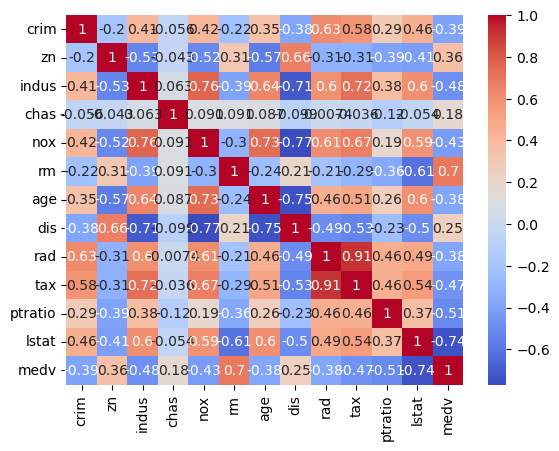

In [129]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');

### 3. Select a `response variable` and a `predictor` based on the correlation between them

In [ ]:
# we are selecting `medv` as the response

# lets analyze the correlations of it sorted
df.corr()['medv'].sort_values(ascending=True)

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

In [ ]:
# we are selecting `lstat` as the predictor
# notice the color on the correlation matrix

### 4. What does using these variables in the model mean in simpler terms?

Since we are using `lstat (% of lower status population)` and `medv (median value of owner-occupied homes in $1000s)`.

This means that **we are examining how the social status of a neighborhood affects housing prices.**

### 5. Scatter plot the response and predictor variables

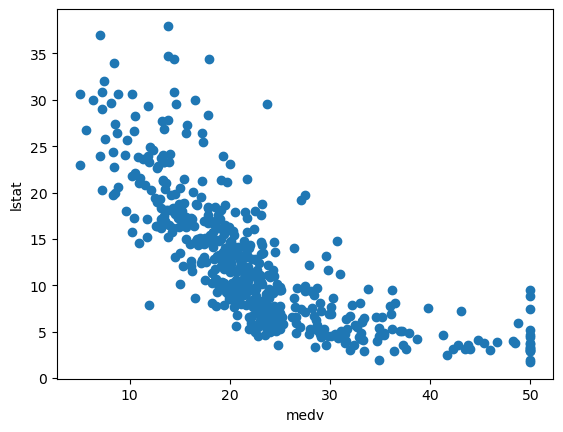

In [132]:
plt.scatter(df['medv'], df['lstat'])
plt.xlabel('medv')
plt.ylabel('lstat')
plt.show()

### 6. Verify for the statistical significance between the variables.

In [133]:
stats.pearsonr(df['medv'], df['lstat'])

PearsonRResult(statistic=np.float64(-0.7376627261740148), pvalue=np.float64(5.081103394387554e-88))

In [ ]:
# the p-value is below 0.05. Therefore, there is significance

# since the scatter plot has a slight curve,
# it will not be a suprise that the spearman correlation
# will be a bit higher than pearson's correlation
stats.spearmanr(df['medv'], df['lstat'])

SignificanceResult(statistic=np.float64(-0.8529141394922164), pvalue=np.float64(2.2217275243129035e-144))

### 7. Define and Fit the Linear Regression Model

A simple linear regression model examines the relationship between two variables: one `independent variable (predictor)` and one `dependent variable (response)`.

We will use the **least squares** method to fit the best line to the data.

- Define X and y
- add the constant to the X variable using `sm.add_contant(target)`
- define the Linear Regression Model using `sm.OLS(y, X)`
- fit the model using `.fit()`
- use the `.summary()` and interpret the results

Note: The function `sm.add_constant()` adds a column of ones to the predictor variable in order to include the intercept term in the regression model.

In [137]:
# medv as a function of lstat
X = sm.add_constant(df['lstat'])
y = df['medv']

In [138]:
X

,const,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [139]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [ ]:
# define, fit and obtain the summary
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           5.08e-88
Time:                        21:53:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 8. Analyze the results


### Interpreting the Summary Output

The summary output provides a detailed report on the regression analysis:

- **R-squared**: This tells us how much of the variation in the dependent variable is explained by the independent variable.
  - An R-squared value of 0.544 means that 54.4% of the variability in the dependent variable (mpg) can be explained by horsepower.
  
- **p-value**: The p-value tells us whether the relationship between the variables is statistically significant.
  - A very small p-value (usually < 0.05) means that there is a significant relationship between the variables.

- **F-statistic**: This measures the overall significance of the regression model. A high F-statistic suggests that the model is statistically significant.

A Step-by-step breakdown of summary

Based on the  `model.params` output.
- `model.params['const']` is the **intercept** of the regression line.
- `model.params[predictor]` is the **slope** of the regression line.

In [163]:
model.params

const    34.553841
lstat    -0.950049
dtype: float64

In [164]:
summarize(model)

,coef,std err,t,P>|t|
const,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


**You can check those on the `.summary()` table again**

### Interpreting the Regression Coefficients

The regression coefficients give us information about the relationship between the independent and dependent variables.

- The `intercept` tells us the **expected value of** the **dependent variable** when the **independent variable is 0.**

- The `slope` tells us **how much the dependent variable changes** for a **one-unit change in the independent variable.**

**These parameters are used to create the equation of the regression line: `Y = slope * X + intercept`.**

---
Take note of the following:
- A good fit is when the points are close to the line.
- Large deviations from the line indicate that the model might not be capturing the true relationship between the variables.



### Plotting the Regression Line
To better understand the relationship, we can plot the regression line on top of the scatter plot.

This allows us to visualize how well the model fits the data.


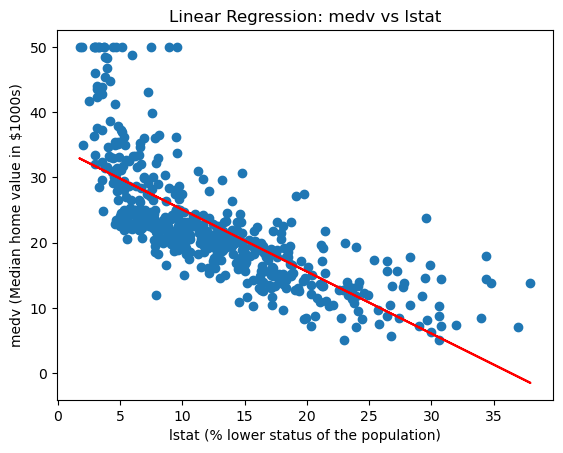

In [ ]:
plt.scatter(df['lstat'], df['medv'])
plt.xlabel(f'lstat (% lower status of the population)')
plt.ylabel('medv (Median home value in $1000s)')
plt.title('Linear Regression: medv vs lstat')

# predicted values based on the existing X data
y_pred = model.predict(sm.add_constant(df['lstat']))

plt.plot(df['lstat'], y_pred, color='red')
plt.show()

### Diagnostic Plots?

Diagnostic plots help us evaluate the quality of the regression model. We will look at the following types of plots:

1. **Residual Plot**: This shows the difference between the observed values and the predicted values. A good fit should show random scatter around zero, with no obvious pattern.
2. **Normal Q-Q Plot**: This plot checks if the residuals (errors) follow a normal distribution. If the points lie on a straight line, the residuals are normally distributed.
3. **Leverage Plot**: This helps identify influential points (outliers) that have a strong effect on the model.

The analysis of these plots can determine if the assumptions of the linear regression model are violated. For example, if the residuals are not normally distributed or show a clear pattern, this indicates a problem with the model.

---

As you create the diagnostic plots, keep in mind the following:
- **Homoscedasticity**: Residuals should have constant variance (not increasing or decreasing systematically).
- **Linearity**: The relationship between X and Y should be linear.
- **Normality of Residuals**: The residuals should follow a normal distribution.

Let’s now proceed to create these plots.


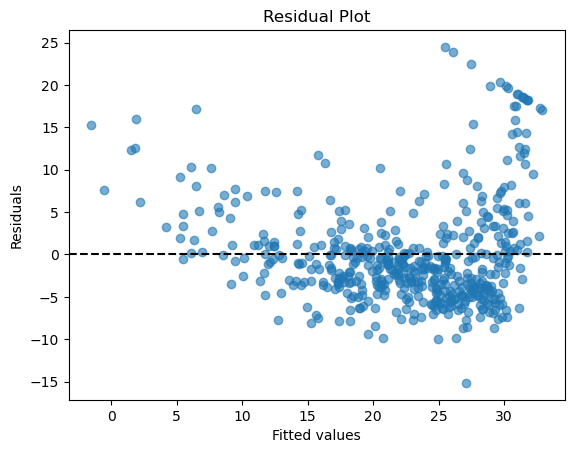

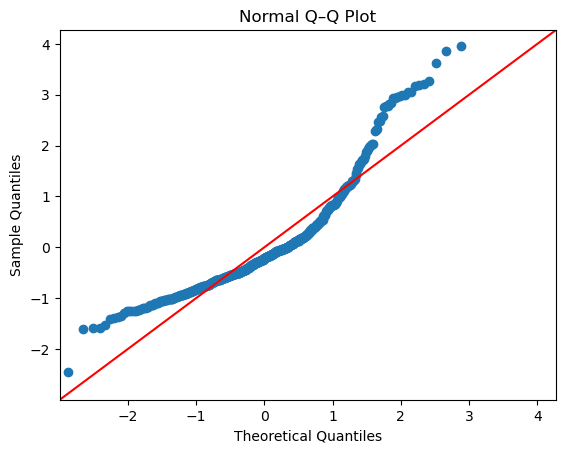

In [160]:
# calculate fitted values and residuals
fitted = model.fittedvalues
residuals = model.resid

# create residual plot
plt.scatter(fitted, residuals, alpha=0.6)
plt.axhline(0, color='black', linestyle='--')  # Reference line at 0
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Interpretation:
# A good fit should show residuals randomly scattered around zero,
# with no visible pattern (no curve or funnel shape).

# create a Q–Q plot of residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q–Q Plot')
plt.show()

### 9. So, we created a model. Now let's try to predict the values of medv given a value of lstat.

- Create a **new DataFrame** with the target values `'lstat':[5, 10, 15]`.



In [168]:
new_data = pd.DataFrame({'lstat': [5, 10, 15]})
new_data

,lstat
0,5
1,10
2,15


### 10. Using the `get_prediction()` function:

- Obtain the **expected values for `medv`**

In [176]:
# add a constant term (intercept)
new_data = sm.add_constant(new_data)

# use get_prediction() function to obtain predictions
# this will provide the expected (mean) values of 'medv' and their intervals
predictions = model.get_prediction(new_data)

# summarize the results
pred_summary = predictions.summary_frame(alpha=0.05)
pred_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


Note that the model predicts that a neighborhood with an lstat value of 5 has an average median home value (medv) of approximately 29.80 (in thousands of dollars).
The 95% confidence interval for the mean prediction ranges from 29.01 to 30.60, while the 95% prediction interval for an individual neighborhood extends from 17.57 to 42.04.
The mean standard error (mean_se) of 0.41 indicates a relatively low level of uncertainty around this estimate.

For a neighborhood with an lstat value of 10, the model estimates an average medv of 25.05, with a 95% confidence interval between 24.47 and 25.63, and a prediction interval from 12.83 to 37.28.
The mean standard error of 0.29 again reflects low uncertainty, showing that the model’s estimate is relatively stable.

When lstat increases to 15, the predicted average medv decreases to 20.30, with a 95% confidence interval from 19.73 to 20.87, and a prediction interval between 8.08 and 32.53.
The mean standard error of 0.29 indicates consistent precision in the model’s predictions.

Overall, these results confirm a **strong negative relationship** between the percentage of lower-status population (lstat) and the median value of homes (medv).
As lstat increases, the expected home value decreases significantly, reflecting lower housing prices in areas with higher proportions of lower socioeconomic status residents.

### 11. Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

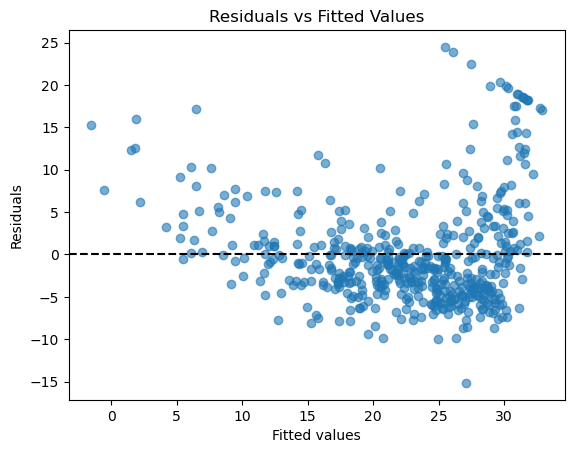

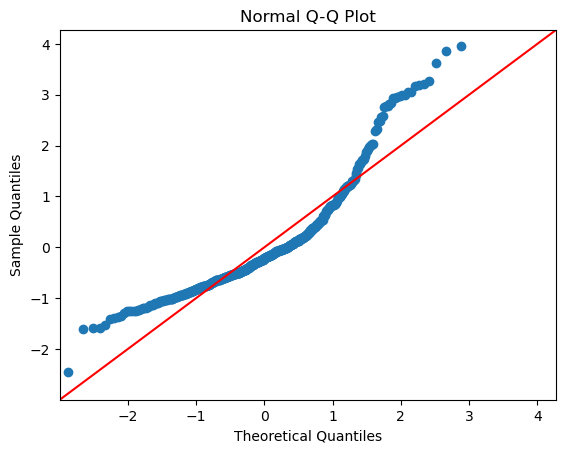

In [175]:
# get fitted values, residuals, and influence statistics
fitted = model.fittedvalues
residuals = model.resid
standardized_residuals = model.get_influence().resid_studentized_internal
leverage = model.get_influence().hat_matrix_diag

# ==========================
# 1. Residuals vs Fitted Plot
# ==========================
plt.scatter(fitted, residuals, alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Interpretation:
# A good fit should show random scatter around zero.
# A curved or funnel pattern suggests non-linearity or unequal variance.

# ==========================
# 2. Normal Q-Q Plot
# ==========================
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Interpretation:
# If residuals are normally distributed, points should fall approximately along the 45° line.


## Let's Practice a bit more!

### 1. Load the `Auto.csv` dataset obtained from the repository.

In [3]:
Auto = pd.read_csv("./Auto.csv")

In [4]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [58]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


### 2. Preprocess the dataset if you find any problem on it

In [5]:
# lets preprocess horsepower since it is object type but should be numeric
# find non-numeric entries
non_numeric_hp = Auto[~Auto['horsepower'].str.isnumeric()]
non_numeric_hp

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [6]:
# alternatively using for
for i, val in enumerate(Auto['horsepower']):
    try:
        float(val)
    except ValueError:
        print(f"Non-numeric entry at index {i}: {val}")

Non-numeric entry at index 32: ?
Non-numeric entry at index 126: ?
Non-numeric entry at index 330: ?
Non-numeric entry at index 336: ?
Non-numeric entry at index 354: ?


In [7]:
# lets replace non-numeric entries with the median horsepower
# coerce converts non-numeric values to NaN
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'], errors='coerce')

# median of valid horsepower values
median_hp = Auto['horsepower'].median()

# Replace NaN with the median
Auto['horsepower'] = Auto['horsepower'].fillna(median_hp)

In [8]:
Auto['horsepower'].dtype

dtype('float64')

In [60]:
Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 3. Select one variable as the response and one as the predictor.

- Analyze the correlation between variables
- `.corr(numeric_only=True)` will help
- plot the correlation matrix, its faster to analyze using it

In [9]:
# lets analyze the correlation between variables
Auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.773582,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.841536,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.895765,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.773582,0.841536,0.895765,1.000000,0.862590,-0.688167,-0.413992,-0.452943
weight,-0.831739,0.897017,0.933104,0.862590,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.688167,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413992,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.452943,-0.581265,0.210084,0.184314,1.000000


<Axes: >

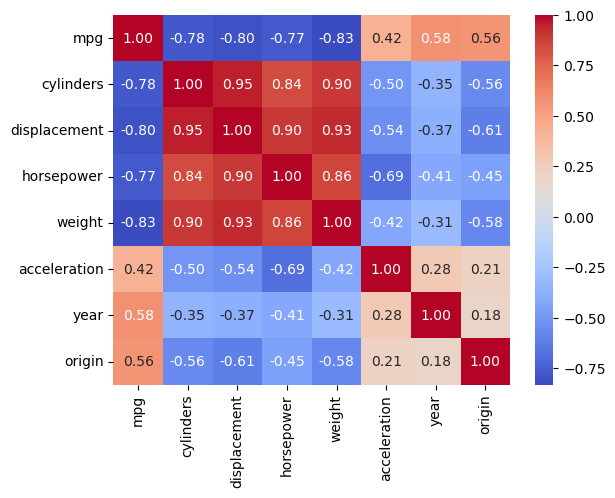

In [ ]:
# correlation matrix
sns.heatmap(Auto.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")

In [ ]:
# lets find the correlation of `mpg` with other variables
Auto.corr(numeric_only=True)['mpg'].sort_values()

weight         -0.831739
displacement   -0.804443
cylinders      -0.776260
horsepower     -0.773582
acceleration    0.422297
origin          0.563698
year            0.581469
mpg             1.000000
Name: mpg, dtype: float64

We have chosen `mpg` as response and `horsepower` as predictor despite `weight` having higher correlation with `mpg`.

This is just to practice.

Try it with other variables as well, specially `weight`.

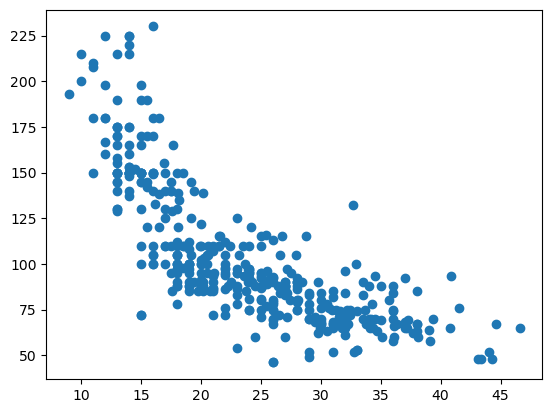

In [117]:
# lets inspect the scatterplot of this association
plt.scatter(Auto['mpg'], Auto['horsepower'])
plt.show()

In [ ]:
# we can see that there is a curve
# as a quick reminder, it will not be a surprise that spearman's correlation
# will be higher than pearson's

stats.spearmanr(Auto['mpg'], Auto['horsepower'])

SignificanceResult(statistic=np.float64(-0.848049574029796), pvalue=np.float64(5.452406674545506e-111))

In [119]:
stats.pearsonr(Auto['mpg'], Auto['horsepower'])

PearsonRResult(statistic=np.float64(-0.7735824727347412), pvalue=np.float64(2.8642551013742134e-80))

### 4. Use the `sm.OLS(`) function to perform a simple linear regression with `mpg` as the response and the `chosen predictor`. Use the `summarize()` function to print the results. Comment on the output.

In [11]:
# lets define X and y
X = sm.add_constant(Auto['horsepower'])
y = Auto['mpg']
model = sm.OLS(y, X).fit()

In [13]:
# define and fit the model
model = sm.OLS(y, X)
auto_model = model.fit()

In [14]:
# obtain the summary
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     588.6
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           2.86e-80
Time:                        23:28:05   Log-Likelihood:                -1198.5
No. Observations:                 397   AIC:                             2401.
Df Residuals:                     395   BIC:                             2409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0213      0.725     55.239      0.000      38.597      41.446
horsepower    -0.1582      0.007    -24.262      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       19.580   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.101
Skew:                           0.534   Prob(JB):                     2.62e-05
Kurtosis:                       3.369   Cond. No.                         323.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. What is the estimated regression equation for the fitted model?

In [ ]:
# y = ax + b 
# mpg = 40.02 - 0.158 * horsepower
# where 40.02 is the intercept
# -0.158 is the slope
# as mpg decreases, horsepower increases

### 6. Is there a relationship between the predictor and the response?

In [ ]:
# Yes. The slope for horsepower is negative and highly significant (p-value < 0.05),
# which indicates a strong negative relationship between horsepower and mpg.

### 7. How strong is the relationship between the predictor and the response?

In [ ]:
# The R-squared of the model (around 0.60) shows that about 60% of the variability
# in mpg is explained by horsepower, indicating a reasonably strong relationship.

### 8. Is the relationship between the predictor and the response positive or negative?

In [ ]:
# The estimated coefficient for horsepower is negative, so the relationship
# between horsepower and mpg is negative: higher horsepower is associated with lower mpg.

### 9. What is the predicted `mpg` associated with the chosen predictor set to the `quantile(0.75)` of it? What are the associated 95 % confidence and prediction intervals?

In [15]:
Auto['horsepower'].quantile(0.75)

np.float64(125.0)

In [16]:
new_hp = pd.DataFrame({'horsepower': [125]})

# add constant term if not already present
new_hp = sm.add_constant(new_hp, has_constant='add')

# guarantee correct order of columns
new_hp = new_hp[auto_model.model.exog_names]

# predict mpg for a car considering 98 horsepower
hp_pred = auto_model.get_prediction(new_hp)
hp_pred.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,20.246034,0.283317,19.689036,20.803033,10.46814,30.023929


**Note that the model predicts that a car with 125 horsepower has an average mpg of around 20.25 (max mean of 20.80) with a 95% confidence interval, lower bound of aproximately 10.47, upper bound of 30.02 and mean_se error of 0.28 which indicates a relatively low level of uncertainty around the prediction.**

### 10. Plot the response and the predictor. Display the regression line.

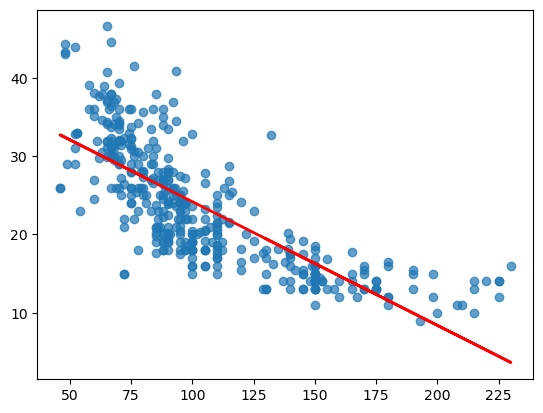

In [ ]:
y_pred = auto_model.predict(sm.add_constant(Auto['horsepower']))

# Scatter plot
plt.scatter(Auto['horsepower'], Auto['mpg'], alpha=0.7)

# Regression line
plt.plot(Auto['horsepower'], y_pred, color='red', linewidth=2)
plt.show()

### 11. Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

In [27]:
# Extract fitted values and residuals
fitted = auto_model.fittedvalues
residuals = auto_model.resid

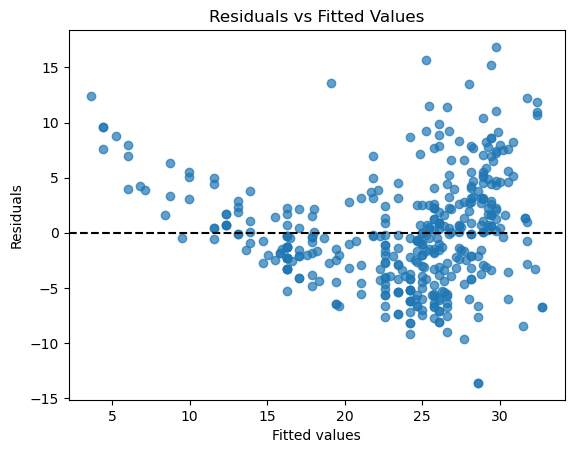

In [ ]:
plt.scatter(fitted, residuals, alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Interpretation:
# Random scatter around zero suggests a good linear fit.
# Any clear curve or funnel shape indicates non-linearity or heteroscedasticity.

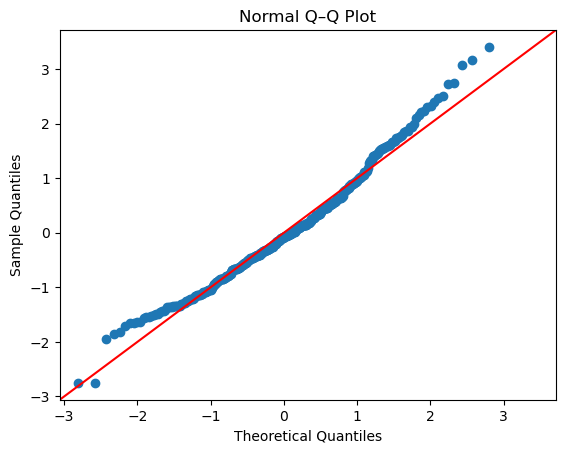

In [ ]:
# Normal Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q–Q Plot')
plt.show()

# Interpretation:
# If residuals follow a normal distribution,
# the points should lie approximately along the 45° reference line.

- `mpg` and `horsepower` residuals presents a curve
- it is not perfectly linear (we have checked that even before defining and fitting the model)
- the model captures a negative trend but the relationship is moderately linear only